In [1]:
import pandas as pd
import numpy as np

from pydataset import data
from scipy import stats

### Null vs Alternative Hypothesis
- $H_0$: no difference or no effect
- $H_a$: there is a difference or effect
- wether Ha is ≠, <,>, determines one-tailed vs. two-tailed test
    - < or > == one-tailed
    - ≠ == two-tailed
    
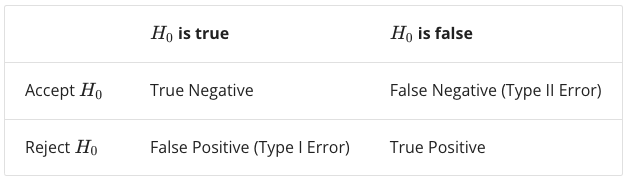

- A **type I** error is when we reject the null hypothesis, but, in reality, the null hypothesis is true.
- A **type II** error is when we fail to reject the null hypothesis when it is actually false.

### Part 1
For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

1. Has the network latency gone up since we switched internet servive providers?

Answer: 
- $H_0$ : There is no difference in network latency due to a swtich in internet servie providers.
- $H_a$ : The is a difference in network latency due to a switch in internet service providers. 
    
    - True positive: We rejcet the $H_0$, there is a difference between latency and providers.
    - False positive (Type I): We reject the $H_0$, there is a diffence betwen latency and providers, but, in reality, there is no difference (null is true). 
    - True Negative: We fail to reject the $H_0$, there is no difference between latency and providers.
    - False Negative (Type II): We fail to reject the $H_0$, there is no difference between latency and providers, however this is false (there is a difference). 

2. Is the website redesign any good?

- $H_0$: There is no difference between the old and new website design.
- $H_a$: There is a difference between the old and new website design. 
    - True positve: We reject the $H_0$, the designs are different. 
    - False positive (Type I): We reject the $H_0$, the designs are different, but, in reality, there is no difference (null is true). 
    - True negative: We fail to reject the $H_0$, there is no  difference in the website desing.
    - False negative (Type II): We fail to reject the $H_0$, we think the designs are not different, however this is false (they are differnt).

3. Is our television ad driving more sales?

- $H_0$: The ad did not impact sales.
- $H_a$: The ad did impact sales. 
    - True positive: We reject the $H_0$, there is a impact from the ad.
    - False positive(Type I): We reject the $H_0$, there is a impact from the ad, but, in reality, there is no difference(null is true).
    - True negative: We fail to reject the $H_0$, there is no impact from the ad. 
    - False negative (Type II): We fail to reject the $H_0$, there is no impact from the ad, however this is false (there is an impact).

### Part II

Use the following contingency table to help answer the question of whether using a Macbook and being a Codeup student are independent of each other.